In [1]:
import Assignment2.df_filter_nvida as df_filter_nvida

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"


from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, BaseRepresentation
from bertopic.vectorizers import ClassTfidfTransformer
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mehdigreefhorst/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
news_articles_data = pd.read_csv("../data/us_equities_news_dataset.csv")
stock_data = pd.read_csv("../data/NVDA.csv")
nvida_news_articles_df = df_filter_nvida.filter_df_to_nvida(df=news_articles_data,
                                                            related_tickers="NVDA")
df_news = df_filter_nvida.add_nvidia_increase_decrease_bool_to_df(df_news=nvida_news_articles_df,
                                                                  df_stock_data=stock_data)
df_news = df_news.drop_duplicates(subset='content', keep='first').reset_index(drop=True)
df_news

nan
nan
nan
nan
nan
nan
nan
nan


,id,ticker,ticker_NVDA_improved,title,title_NVIDIA_topic,category,content,content_NVIDIA_topic,release_date,provider,url,article_id,NVIDIA_stock_increase
0,221539,NIO,True,A Central Bank War Just Started And Its Good F...,False,opinion,ECB Effects\nThe move in the euro was huge fa...,True,2019-03-07,Michael Kramer,https://www.investing.com/analysis/a-central-b...,200395687,0
1,221547,NIO,True,6 Stocks To Watch Nivida Could Be Falling,False,opinion,6 Stocks To Watch March 6 Trading Session\nSt...,True,2019-03-06,Michael Kramer,https://www.investing.com/analysis/6-stocks-to...,200394931,0
2,221572,NIO,True,Stocks Dow Drops Nearly 400 Points as Apple ...,False,news,Investing com A rout in Apple and Facebook ...,True,2018-11-19,Investing.com,https://www.investing.com/news/stock-market-ne...,1694042,0
3,221593,UBER,True,The Zacks Analyst Blog Highlights Advanced Mi...,True,opinion,For Immediate ReleaseChicago IL January 13 ...,True,2020-01-12,Zacks Investment Research,https://www.investing.com/analysis/the-zacks-a...,200498277,0
4,221597,UBER,True,The Best Of CES 2020 Revised,False,opinion,With 4 500 companies bringing their innovation...,True,2020-01-16,Zacks Investment Research,https://www.investing.com/analysis/the-best-of...,200499164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,442657,AMD,True,Here s Why Nvidia NVDA Stock Is Gaining Today,True,opinion,Shares of Nvidia NASDAQ NVDA are up nearly...,True,2016-09-27,Zacks Investment Research,https://www.investing.com/analysis/here's-why-...,200155860,1
3437,442682,AMD,True,4 Stocks To Watch Today ATW CWEI MXL SLCA,False,opinion,It was a pretty good start to the week on Mond...,True,2016-05-17,Harry Boxer,"https://www.investing.com/analysis/atw,-cwei,-...",200130262,1
3438,442705,AMD,True,Here s What The Buy Side Expects From AMD Thur...,False,opinion,Advanced Micro Devices Inc NYSE AMD is set ...,True,2014-04-17,Estimize,https://www.investing.com/analysis/here’s-what...,209915,1
3439,442984,T,True,Zacks com Featured Highlights AT T Nu Skin E...,True,opinion,For Immediate Release\n\nChicago IL July 22...,True,2016-07-21,Zacks Investment Research,https://www.investing.com/analysis/zacks.com-f...,200143537,0


In [10]:
def get_standard_bertopic(model_setting_index=0, customer_model_settings = None):
    """
    each of the steps in bertopic are assigned using the model settings, in the future this can be replaced with a grid search system to evaluate different model settings, but this is the most basic version with standard parameters. each of the model settings is in a list
    :param model_setting_index: defines which of the hyperparamter settings to pick
    :return: 
    """
    model_settings = [{
        "language": "english",
        "nr_topics": None,
        "document_embedding": SentenceTransformer("all-MiniLM-L6-v2"),
        "reduce_dimensionality": UMAP(),
        "clustering": HDBSCAN(),
        "topic_tokenization": CountVectorizer(stop_words="english"),
        "topic_representation": ClassTfidfTransformer(),
        "representation_model": KeyBERTInspired()
    },
    {
        "language": "english",
        "nr_topics": 25,
        "document_embedding": SentenceTransformer("all-MiniLM-L6-v2"),
        "reduce_dimensionality": UMAP(),
        "clustering": HDBSCAN(),
        "topic_tokenization": CountVectorizer(stop_words="english"),
        "topic_representation": ClassTfidfTransformer(),
        "representation_model": KeyBERTInspired()
    },
    {
        "language": "english",
        "nr_topics": 25,
        "document_embedding": SentenceTransformer("all-MiniLM-L6-v2"),
        "reduce_dimensionality": UMAP(),
        "clustering": HDBSCAN(min_cluster_size=15),
        "topic_tokenization": CountVectorizer(stop_words="english"),
        "topic_representation": ClassTfidfTransformer(),
        "representation_model": KeyBERTInspired()
    },
    {
        "language": "english",
        "nr_topics": "auto",
        "document_embedding": SentenceTransformer("all-MiniLM-L6-v2"),
        "reduce_dimensionality": UMAP(min_dist=0.05, spread=0.5),
        "clustering": HDBSCAN(min_cluster_size=15),
        "topic_tokenization": CountVectorizer(stop_words="english"),
        "topic_representation": ClassTfidfTransformer(),
        "representation_model": KeyBERTInspired()
    }
    ]
    
    if customer_model_settings is not None:
        for key in model_settings[0].keys():
            if key not in customer_model_settings.keys():
                raise Exception(f"Missing key: {key}")
            
            
    # Step 1 - Extract embeddings
    embedding_model = model_settings[model_setting_index]["document_embedding"]
    
    # Step 2 - Reduce dimensionality
    umap_model = model_settings[model_setting_index]["reduce_dimensionality"]

    # Step 3 - Cluster reduced embeddings
    hdbscan_model = model_settings[model_setting_index]["clustering"]

    # Step 4 - Tokenize topics
    vectorizer_model = model_settings[model_setting_index]["topic_tokenization"]

    # Step 5 - Create topic representation
    ctfidf_model = model_settings[model_setting_index]["topic_representation"]

    # Step 6 - (Optional) Fine-tune topic representations with
    # a `bertopic.representation` model
    representation_model = model_settings[model_setting_index]["representation_model"]
    
    language = model_settings[model_setting_index]["language"]

    # All steps together
    topic_model = BERTopic(
        language=language,
        nr_topics=model_settings[model_setting_index]["nr_topics"],
        embedding_model=embedding_model,          # Step 1 - Extract embeddings
        umap_model=umap_model,                    # Step 2 - Reduce dimensionality
        hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
        vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
        ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
        representation_model=representation_model # Step 6 - (Optional) Fine-tune topic represenations
    )
    return topic_model

def train_bertopic_model(documents, model_setting_index=0, customer_model_settings = None):
    """
    trains the bertopic model from the documents that are given as a parameter
    :param documents: an array of documents to get topics made of
    :param model_setting_index: specifies which batch of hyperparameters to pick that define bertopic. Standard = 0
    :return: 
    """
    topic_model = get_standard_bertopic(model_setting_index=model_setting_index, 
                                        customer_model_settings=customer_model_settings)
    topics, props = topic_model.fit_transform(documents)
    return topic_model, topics, props
    
def get_topics_that_relate_to_nvidia(topic_model):
    """
    this function finds the topics that relate most to the input words given which is NVIDIA
    :param topic_model: 
    :return: 
    """
    similar_topics, similarities = topic_model.find_topics("NVIDIA", top_n=3)
    for topic_nr, similarity in zip(similar_topics, similarities):
        print(f"topic_nr: {topic_nr} | similarity to NVIDIA: {similarity}")
        print(f"words with similarities for topic:")
        print(topic_model.get_topic(topic_nr))
        

def get_coherence(df, _topic_model, _topics_numbers):
    # add the new topic numbers to the "topic" column
    df['topic'] = _topics_numbers
    documents_per_topic = df.groupby(['topic'], as_index=False).agg({'content': ' '.join})
    cleaned_docs = _topic_model._preprocess_text(documents_per_topic.content.values)
    
    # Extract vectorizer and analyzer from BERTopic
    vectorizer = _topic_model.vectorizer_model
    analyzer = vectorizer.build_analyzer()
    
    
    # Extract features for Topic Coherence evaluation
    #words = vectorizer.get_feature_names()
    tokens = [analyzer(doc) for doc in cleaned_docs]
    dictionary = corpora.Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    topic_words = [[words for words, _ in _topic_model.get_topic(topic)] 
                   for topic in range(len(set(df["topic"]))-1)]
    
    # Evaluate
    coherence_model = CoherenceModel(topics=topic_words, 
                                     texts=tokens, 
                                     corpus=corpus,
                                     dictionary=dictionary, 
                                     coherence='c_v')
    coherence = coherence_model.get_coherence()
    return coherence

def get_topic_diversity(topic_model):
    unique_words = set()
    total_words = 0
    
    for topic_nr, topic_similarity_word_list in topic_model.topic_representations_.items():
        # the first topic is not a topic, these are the outlier documents, so we should disregard these
        if topic_nr == -1:
            continue
        for topic_word, similarity in topic_similarity_word_list:
            
            total_words += 1
            unique_words.add(topic_word)
            
    topic_diversity = len(unique_words)/total_words
    return topic_diversity


def show_bertopic_evaluations(custom_bert_params, iteration=0):
    print("iteration = ", iteration)
    _topic_model_content, _topics_numbers, _probs_numbers = train_bertopic_model(df_news["content"],
                                                                                 model_setting_index=-1,
                                                                                 customer_model_settings=custom_bert_params)
    print("total number of topics = ", len(_topic_model_content.get_topic_info()))
    print("documents without a topic = ", _topic_model_content.get_topic_info(-1)["Count"].values[0])
    #print("topic diversity = ", get_topic_diversity(_topic_model_content))
    #print("topic coherence = ", get_coherence(df_news, _topic_model_content, _topics_numbers))
    _topic_model_content.visualize_topics().write_image(f'plots/intertopic_{iteration}.jpg')
    _topic_model_content.visualize_barchart(top_n_topics=60, n_words=20).write_image(f"plots/topicbar_{iteration}.jpg")
    return _topic_model_content, _topics_numbers, _probs_numbers


In [4]:
import kaleido

custom_bert_parameters = {
    "language": "english",
    "nr_topics": "auto",
    "document_embedding": SentenceTransformer("all-MiniLM-L6-v2"),
    "reduce_dimensionality": UMAP(min_dist=0.05, n_neighbors=15, spread=0.6 ),
    "clustering": HDBSCAN(min_cluster_size=15),
    "topic_tokenization": CountVectorizer(stop_words="english"),
    "topic_representation": ClassTfidfTransformer(reduce_frequent_words=True),
    "representation_model": KeyBERTInspired()
}
show_bertopic_evaluations(custom_bert_parameters)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


total number of topics =  46
documents without a topic =  1017
topic diversity =  0.43777777777777777
topic coherence =  0.5334540744410476


(<bertopic._bertopic.BERTopic at 0x3054d5580>,
 [19,
  -1,
  -1,
  41,
  41,
  41,
  -1,
  3,
  3,
  0,
  5,
  -1,
  44,
  3,
  29,
  -1,
  -1,
  3,
  -1,
  34,
  3,
  3,
  3,
  -1,
  -1,
  -1,
  5,
  8,
  30,
  3,
  -1,
  3,
  29,
  -1,
  -1,
  3,
  -1,
  -1,
  38,
  -1,
  -1,
  -1,
  -1,
  4,
  -1,
  -1,
  3,
  30,
  4,
  12,
  -1,
  3,
  12,
  12,
  0,
  12,
  12,
  20,
  2,
  2,
  2,
  -1,
  12,
  12,
  11,
  12,
  12,
  28,
  31,
  -1,
  20,
  -1,
  -1,
  2,
  13,
  -1,
  31,
  31,
  12,
  31,
  18,
  37,
  -1,
  -1,
  -1,
  19,
  4,
  -1,
  -1,
  -1,
  29,
  -1,
  41,
  17,
  31,
  4,
  -1,
  8,
  -1,
  12,
  31,
  -1,
  31,
  1,
  -1,
  18,
  -1,
  23,
  1,
  -1,
  17,
  18,
  10,
  15,
  -1,
  1,
  23,
  -1,
  23,
  23,
  -1,
  23,
  1,
  23,
  18,
  23,
  -1,
  23,
  23,
  10,
  11,
  23,
  37,
  -1,
  -1,
  -1,
  1,
  -1,
  3,
  -1,
  15,
  -1,
  19,
  38,
  31,
  -1,
  -1,
  5,
  1,
  18,
  1,
  37,
  1,
  1,
  42,
  12,
  -1,
  40,
  40,
  1,
  1,
  31,
  -1,
  0,
  33,
  3

### Very good one!

In [11]:


custom_bert_parameters = {
    "language": "english",
    "nr_topics": "auto",
    "document_embedding": SentenceTransformer("all-MiniLM-L6-v2"),
    "reduce_dimensionality": UMAP(min_dist=0.05, spread=0.5),
    "clustering": HDBSCAN(min_cluster_size=15),
    "topic_tokenization": CountVectorizer(stop_words="english"),
    "topic_representation": ClassTfidfTransformer(reduce_frequent_words=True),
    "representation_model": KeyBERTInspired(top_n_words=20)
}
show_bertopic_evaluations(custom_bert_parameters, iteration=2)

iteration =  2
total number of topics =  38
documents without a topic =  992


(<bertopic._bertopic.BERTopic at 0x3518b01d0>,
 [10,
  -1,
  3,
  -1,
  -1,
  -1,
  -1,
  4,
  4,
  0,
  6,
  1,
  -1,
  4,
  3,
  1,
  -1,
  4,
  -1,
  29,
  4,
  4,
  4,
  -1,
  -1,
  -1,
  6,
  -1,
  23,
  4,
  -1,
  4,
  3,
  -1,
  -1,
  4,
  -1,
  3,
  27,
  -1,
  -1,
  -1,
  33,
  -1,
  -1,
  -1,
  4,
  23,
  2,
  11,
  -1,
  4,
  11,
  11,
  0,
  11,
  11,
  15,
  5,
  9,
  9,
  18,
  11,
  11,
  -1,
  11,
  11,
  18,
  26,
  -1,
  15,
  3,
  -1,
  9,
  14,
  -1,
  26,
  26,
  11,
  26,
  2,
  36,
  2,
  -1,
  -1,
  10,
  -1,
  -1,
  -1,
  -1,
  3,
  -1,
  -1,
  -1,
  26,
  2,
  -1,
  -1,
  2,
  11,
  26,
  -1,
  26,
  1,
  -1,
  -1,
  -1,
  20,
  1,
  -1,
  -1,
  -1,
  -1,
  12,
  1,
  1,
  20,
  1,
  20,
  20,
  -1,
  20,
  1,
  20,
  -1,
  20,
  -1,
  20,
  20,
  12,
  -1,
  20,
  -1,
  -1,
  3,
  3,
  1,
  -1,
  4,
  17,
  12,
  1,
  10,
  27,
  26,
  2,
  -1,
  6,
  1,
  2,
  1,
  36,
  1,
  1,
  28,
  11,
  9,
  32,
  32,
  1,
  1,
  26,
  -1,
  0,
  -1,
  -1,
  -1,
  -1,


The sentence transformer chosen is all-MiniLM-L6-v2. This is one of the better models that Maarten Grootendorst has evaluated, but it has a much faster computation time than for example the best model "all-mpnet-base-v2", which would result in 2% better performance but a 5 times slower running time.

In [17]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.representation import KeyBERTInspired
from itertools import product
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm

def create_parameter_grid():
    """Define the parameter grid for hyperparameter tuning."""
    param_grid = {
        "language": ["english"],  # keeping consistent with your implementation
        "nr_topics": ["auto"],
        "document_embedding": [
            SentenceTransformer("all-MiniLM-L6-v2"),
            #SentenceTransformer("all-mpnet-base-v2")
        ],
        "reduce_dimensionality": [
            UMAP(min_dist=d, n_neighbors=n)
            for d, n in product(
                [0.0, 0.05, 0.1],  # min_dist
                [5, 15],  # n_neighbors
            )
        ],
        "clustering": [
            HDBSCAN(min_cluster_size=s, min_samples=m)
            for s, m in product(
                [5, 10, 15, 20],  # min_cluster_size
                [None, 5, 10]  # min_samples
            )
        ],
        "topic_tokenization": [
            CountVectorizer(stop_words="english", ngram_range=n)
            for n in [(1,1), (1,2)]  # ngram_range
                
            
        ],
        "topic_representation": [
            ClassTfidfTransformer(reduce_frequent_words=rf)
            for rf in [True]
        ],
        "representation_model": [KeyBERTInspired()]
    }
    return param_grid

def run_hyperparameter_tuning(df, max_combinations=3):
    """Run hyperparameter tuning using your existing functions."""
    param_grid = create_parameter_grid()
    results = []
    
    # Generate parameter combinations
    param_keys = list(param_grid.keys())
    param_values = list(param_grid.values())
    combinations = list(product(*param_values))
    print("combinations to test= ", len(combinations))
    
    if max_combinations:
        combinations = combinations[:max_combinations]
    combo_iteration = 0
    for combo in tqdm(combinations, desc="Evaluating model configurations"):
        combo_iteration += 1
        try:
            # Create parameter dictionary for current combination
            current_params = dict(zip(param_keys, combo))
            
            # Use your existing function to train and evaluate the model
            topic_model, topics, probs = show_bertopic_evaluations(current_params, combo_iteration)
            
            # Get evaluation metrics
            topic_info = topic_model.get_topic_info()
            
            result = {
                # Configuration identifiers
                'iteration': combo_iteration,
                'embedding_model': current_params['document_embedding'].__class__.__name__,
                'umap_min_dist': current_params['reduce_dimensionality'].min_dist,
                'umap_n_neighbors': current_params['reduce_dimensionality'].n_neighbors,
                'umap_spread': current_params['reduce_dimensionality'].spread,
                'hdbscan_min_cluster_size': current_params['clustering'].min_cluster_size,
                'hdbscan_min_samples': current_params['clustering'].min_samples,
                'vectorizer_ngram_range': current_params['topic_tokenization'].ngram_range,
                'vectorizer_min_df': current_params['topic_tokenization'].min_df,
                'reduce_frequent_words': current_params['topic_representation'].reduce_frequent_words,
                'nr_topics_setting': str(current_params['nr_topics']),
                
                # Evaluation metrics (using your existing functions)
                'number_of_topics': len(topic_info),
                'docs_without_topic': topic_info.iloc[0]['Count'] if -1 in topics else 0,
                'topic_diversity': get_topic_diversity(topic_model),
                'topic_coherence': get_coherence(df, topic_model, topics),
                
                # Store the model and topics for later use if needed
                'model': topic_model,
                'topics': topics,
                'probs': probs
            }
            
            results.append(result)
            
        except Exception as e:
            print(f"Error with configuration: {e}")
            continue
    
    return pd.DataFrame(results)

def plot_results(results_df):
    """Create visualizations for the hyperparameter tuning results."""
    # Remove the model and topics columns for plotting
    plot_df = results_df.drop(['model', 'topics', 'probs'], axis=1)
    
    # 3D scatter plot
    fig1 = go.Figure(data=[go.Scatter3d(
        x=plot_df['number_of_topics'],
        y=plot_df['topic_coherence'],
        z=plot_df['topic_diversity'],
        mode='markers',
        marker=dict(
            size=8,
            color=plot_df['docs_without_topic'],
            colorscale='Viridis',
            opacity=0.8
        ),
        text=[f"Config {i}" for i in range(len(plot_df))]
    )])
    
    fig1.update_layout(
        title='Topic Model Configurations in 3D Space',
        scene=dict(
            xaxis_title='Number of Topics',
            yaxis_title='Topic Coherence',
            zaxis_title='Topic Diversity'
        )
    )
    
    # Parallel coordinates plot
    fig2 = px.parallel_coordinates(plot_df,
        dimensions=['number_of_topics', 'topic_coherence', 'topic_diversity', 
                   'docs_without_topic', 'umap_min_dist', 'hdbscan_min_cluster_size'],
        title='Parallel Coordinates Plot of Model Configurations'
    )
    
    return fig1, fig2

def find_best_models(results_df, n_best=5):
    """Find the best performing models based on multiple metrics."""
    # Create normalized scores for each metric
    metrics = ['topic_coherence', 'topic_diversity', 'number_of_topics']
    
    # Remove non-numeric columns and normalize
    scoring_df = results_df.copy()
    for metric in metrics:
        max_val = scoring_df[metric].max()
        min_val = scoring_df[metric].min()
        scoring_df[f'{metric}_normalized'] = (scoring_df[metric] - min_val) / (max_val - min_val)
    
    # Calculate composite score (you can adjust weights as needed)
    scoring_df['composite_score'] = (
        scoring_df['topic_coherence_normalized'] * 0.4 +
        scoring_df['topic_diversity_normalized'] * 0.3 +
        scoring_df['number_of_topics_normalized'] * 0.3
    )
    
    # Penalize for documents without topics
    scoring_df['composite_score'] = scoring_df['composite_score'] * (
        1 - scoring_df['docs_without_topic'] / scoring_df['docs_without_topic'].max()
    )
    
    # Get best models
    best_models = scoring_df.nlargest(n_best, 'composite_score')
    return best_models

# Example usage:
results_df = run_hyperparameter_tuning(df_news, max_combinations=144)
fig1, fig2 = plot_results(results_df)
fig1.show()
fig2.show()
best_models = find_best_models(results_df)
print("Best performing models:")
print(best_models[['composite_score', 'number_of_topics', 'topic_coherence', 'topic_diversity', 'docs_without_topic']])

combinations to test=  144


Evaluating model configurations:   0%|          | 0/144 [00:00<?, ?it/s]

iteration =  1
total number of topics =  28
documents without a topic =  1016


Evaluating model configurations:   1%|          | 1/144 [00:49<1:58:57, 49.92s/it]

iteration =  2
total number of topics =  30
documents without a topic =  940


Evaluating model configurations:   1%|▏         | 2/144 [01:40<1:59:14, 50.39s/it]

iteration =  3
total number of topics =  46
documents without a topic =  970


Evaluating model configurations:   2%|▏         | 3/144 [02:32<1:59:36, 50.90s/it]

iteration =  4
total number of topics =  26
documents without a topic =  1021


Evaluating model configurations:   3%|▎         | 4/144 [03:19<1:55:32, 49.52s/it]

iteration =  5
total number of topics =  20
documents without a topic =  947


Evaluating model configurations:   3%|▎         | 5/144 [04:06<1:52:14, 48.45s/it]

iteration =  6
total number of topics =  33
documents without a topic =  928


Evaluating model configurations:   4%|▍         | 6/144 [04:55<1:51:54, 48.66s/it]

iteration =  7
total number of topics =  35
documents without a topic =  929


Evaluating model configurations:   5%|▍         | 7/144 [05:45<1:52:04, 49.08s/it]

iteration =  8
total number of topics =  36
documents without a topic =  980


Evaluating model configurations:   6%|▌         | 8/144 [06:34<1:51:49, 49.33s/it]

iteration =  9
total number of topics =  17
documents without a topic =  1069


Evaluating model configurations:   6%|▋         | 9/144 [07:21<1:48:51, 48.38s/it]

iteration =  10
total number of topics =  10
documents without a topic =  1089


Evaluating model configurations:   7%|▋         | 10/144 [08:04<1:44:23, 46.74s/it]

iteration =  11
total number of topics =  21
documents without a topic =  1030


Evaluating model configurations:   8%|▊         | 11/144 [08:50<1:43:31, 46.70s/it]

iteration =  12
total number of topics =  42
documents without a topic =  941


Evaluating model configurations:   8%|▊         | 12/144 [09:43<1:46:25, 48.37s/it]

iteration =  13
total number of topics =  26
documents without a topic =  932


Evaluating model configurations:   9%|▉         | 13/144 [10:30<1:44:49, 48.01s/it]

iteration =  14
total number of topics =  22
documents without a topic =  1027


Evaluating model configurations:  10%|▉         | 14/144 [11:18<1:44:00, 48.01s/it]

iteration =  15
total number of topics =  29
documents without a topic =  1032


Evaluating model configurations:  10%|█         | 15/144 [12:07<1:43:39, 48.22s/it]

iteration =  16
total number of topics =  34
documents without a topic =  919


Evaluating model configurations:  11%|█         | 16/144 [12:57<1:44:25, 48.95s/it]

iteration =  17
total number of topics =  20
documents without a topic =  1088


Evaluating model configurations:  12%|█▏        | 17/144 [13:43<1:41:23, 47.90s/it]

iteration =  18
total number of topics =  39
documents without a topic =  931


Evaluating model configurations:  12%|█▎        | 18/144 [14:34<1:42:52, 48.99s/it]

iteration =  19
total number of topics =  32
documents without a topic =  747


Evaluating model configurations:  13%|█▎        | 19/144 [15:23<1:42:04, 48.99s/it]

iteration =  20
total number of topics =  27
documents without a topic =  972


Evaluating model configurations:  14%|█▍        | 20/144 [16:12<1:41:00, 48.87s/it]

iteration =  21
total number of topics =  31
documents without a topic =  916


Evaluating model configurations:  15%|█▍        | 21/144 [17:02<1:40:44, 49.14s/it]

iteration =  22
total number of topics =  33
documents without a topic =  1126


Evaluating model configurations:  15%|█▌        | 22/144 [17:52<1:40:32, 49.45s/it]

iteration =  23
total number of topics =  27
documents without a topic =  1024


Evaluating model configurations:  16%|█▌        | 23/144 [18:42<1:40:13, 49.70s/it]

iteration =  24
total number of topics =  37
documents without a topic =  944


Evaluating model configurations:  17%|█▋        | 24/144 [19:31<1:39:13, 49.62s/it]

iteration =  25
total number of topics =  19
documents without a topic =  954


Evaluating model configurations:  17%|█▋        | 25/144 [20:17<1:35:46, 48.29s/it]

iteration =  26
total number of topics =  34
documents without a topic =  886


Evaluating model configurations:  18%|█▊        | 26/144 [21:08<1:36:45, 49.20s/it]

iteration =  27
total number of topics =  32
documents without a topic =  1014


Evaluating model configurations:  19%|█▉        | 27/144 [21:59<1:36:52, 49.68s/it]

iteration =  28
total number of topics =  35
documents without a topic =  973


Evaluating model configurations:  19%|█▉        | 28/144 [22:49<1:36:32, 49.94s/it]

iteration =  29
total number of topics =  34
documents without a topic =  1071


Evaluating model configurations:  20%|██        | 29/144 [23:40<1:36:14, 50.22s/it]

iteration =  30
total number of topics =  35
documents without a topic =  1055


Evaluating model configurations:  21%|██        | 30/144 [24:30<1:35:19, 50.17s/it]

iteration =  31
total number of topics =  33
documents without a topic =  1004


Evaluating model configurations:  22%|██▏       | 31/144 [25:20<1:34:14, 50.04s/it]

iteration =  32
total number of topics =  35
documents without a topic =  1029


Evaluating model configurations:  22%|██▏       | 32/144 [26:11<1:33:52, 50.29s/it]

iteration =  33
total number of topics =  30
documents without a topic =  953


Evaluating model configurations:  23%|██▎       | 33/144 [27:00<1:32:26, 49.97s/it]

iteration =  34
total number of topics =  35
documents without a topic =  924


Evaluating model configurations:  24%|██▎       | 34/144 [27:51<1:31:58, 50.16s/it]

iteration =  35
total number of topics =  29
documents without a topic =  1025


Evaluating model configurations:  24%|██▍       | 35/144 [28:40<1:30:54, 50.04s/it]

iteration =  36
total number of topics =  37
documents without a topic =  927


Evaluating model configurations:  25%|██▌       | 36/144 [29:30<1:29:55, 49.96s/it]

iteration =  37
total number of topics =  19
documents without a topic =  941


Evaluating model configurations:  26%|██▌       | 37/144 [30:17<1:27:21, 48.98s/it]

iteration =  38
total number of topics =  23
documents without a topic =  1000


Evaluating model configurations:  26%|██▋       | 38/144 [31:08<1:27:36, 49.59s/it]

iteration =  39
total number of topics =  34
documents without a topic =  1052


Evaluating model configurations:  27%|██▋       | 39/144 [31:58<1:27:17, 49.88s/it]

iteration =  40
total number of topics =  21
documents without a topic =  1066


Evaluating model configurations:  28%|██▊       | 40/144 [32:47<1:25:37, 49.40s/it]

iteration =  41
total number of topics =  29
documents without a topic =  896


Evaluating model configurations:  28%|██▊       | 41/144 [33:37<1:25:28, 49.79s/it]

iteration =  42
total number of topics =  37
documents without a topic =  991


Evaluating model configurations:  29%|██▉       | 42/144 [34:28<1:25:03, 50.03s/it]

iteration =  43
total number of topics =  27
documents without a topic =  943


Evaluating model configurations:  30%|██▉       | 43/144 [35:18<1:24:12, 50.03s/it]

iteration =  44
total number of topics =  44
documents without a topic =  882


Evaluating model configurations:  31%|███       | 44/144 [36:09<1:23:55, 50.35s/it]

iteration =  45
total number of topics =  34
documents without a topic =  1081


Evaluating model configurations:  31%|███▏      | 45/144 [37:00<1:23:21, 50.52s/it]

iteration =  46
total number of topics =  27
documents without a topic =  865


Evaluating model configurations:  32%|███▏      | 46/144 [37:50<1:22:19, 50.41s/it]

iteration =  47
total number of topics =  30
documents without a topic =  984


Evaluating model configurations:  33%|███▎      | 47/144 [38:40<1:21:00, 50.11s/it]

iteration =  48
total number of topics =  33
documents without a topic =  933


Evaluating model configurations:  33%|███▎      | 48/144 [39:31<1:20:54, 50.57s/it]

iteration =  49
total number of topics =  32
documents without a topic =  1009


Evaluating model configurations:  34%|███▍      | 49/144 [40:21<1:19:51, 50.43s/it]

iteration =  50
total number of topics =  32
documents without a topic =  1041


Evaluating model configurations:  35%|███▍      | 50/144 [41:13<1:19:21, 50.65s/it]

iteration =  51
total number of topics =  18
documents without a topic =  1046


Evaluating model configurations:  35%|███▌      | 51/144 [42:03<1:18:21, 50.55s/it]

iteration =  52
total number of topics =  29
documents without a topic =  912


Evaluating model configurations:  36%|███▌      | 52/144 [42:54<1:17:49, 50.75s/it]

iteration =  53
total number of topics =  23
documents without a topic =  1004


Evaluating model configurations:  37%|███▋      | 53/144 [43:44<1:16:30, 50.44s/it]

iteration =  54
total number of topics =  30
documents without a topic =  930


Evaluating model configurations:  38%|███▊      | 54/144 [44:37<1:17:00, 51.34s/it]

iteration =  55
total number of topics =  13
documents without a topic =  947


Evaluating model configurations:  38%|███▊      | 55/144 [45:26<1:15:04, 50.61s/it]

iteration =  56
total number of topics =  23
documents without a topic =  1040


Evaluating model configurations:  39%|███▉      | 56/144 [46:18<1:14:52, 51.05s/it]

iteration =  57
total number of topics =  42
documents without a topic =  949


Evaluating model configurations:  40%|███▉      | 57/144 [47:19<1:18:04, 53.85s/it]

iteration =  58
total number of topics =  32
documents without a topic =  918


Evaluating model configurations:  40%|████      | 58/144 [48:11<1:16:44, 53.54s/it]

iteration =  59
total number of topics =  35
documents without a topic =  823


Evaluating model configurations:  41%|████      | 59/144 [49:07<1:16:39, 54.11s/it]

iteration =  60
total number of topics =  24
documents without a topic =  931


Evaluating model configurations:  42%|████▏     | 60/144 [49:59<1:14:52, 53.48s/it]

iteration =  61
total number of topics =  46
documents without a topic =  996


Evaluating model configurations:  42%|████▏     | 61/144 [50:53<1:14:26, 53.81s/it]

iteration =  62
total number of topics =  18
documents without a topic =  1071


Evaluating model configurations:  43%|████▎     | 62/144 [51:40<1:10:24, 51.52s/it]

iteration =  63
total number of topics =  32
documents without a topic =  934


Evaluating model configurations:  44%|████▍     | 63/144 [52:31<1:09:29, 51.47s/it]

iteration =  64
total number of topics =  37
documents without a topic =  851


Evaluating model configurations:  44%|████▍     | 64/144 [53:24<1:09:04, 51.81s/it]

iteration =  65
total number of topics =  20
documents without a topic =  1026


Evaluating model configurations:  45%|████▌     | 65/144 [54:16<1:08:16, 51.85s/it]

iteration =  66
total number of topics =  33
documents without a topic =  1042


Evaluating model configurations:  46%|████▌     | 66/144 [55:08<1:07:44, 52.11s/it]

iteration =  67
total number of topics =  27
documents without a topic =  849


Evaluating model configurations:  47%|████▋     | 67/144 [56:02<1:07:42, 52.76s/it]

iteration =  68
total number of topics =  44
documents without a topic =  936


Evaluating model configurations:  47%|████▋     | 68/144 [56:58<1:07:52, 53.59s/it]

iteration =  69
total number of topics =  30
documents without a topic =  937


Evaluating model configurations:  48%|████▊     | 69/144 [57:52<1:07:05, 53.67s/it]

iteration =  70
total number of topics =  31
documents without a topic =  904


Evaluating model configurations:  49%|████▊     | 70/144 [58:47<1:06:40, 54.05s/it]

iteration =  71
total number of topics =  25
documents without a topic =  1003


Evaluating model configurations:  49%|████▉     | 71/144 [59:38<1:04:39, 53.14s/it]

iteration =  72
total number of topics =  35
documents without a topic =  946


Evaluating model configurations:  50%|█████     | 72/144 [1:00:34<1:04:43, 53.94s/it]

iteration =  73
total number of topics =  19
documents without a topic =  1042


Evaluating model configurations:  51%|█████     | 73/144 [1:01:22<1:01:46, 52.20s/it]

iteration =  74
total number of topics =  21
documents without a topic =  1073


Evaluating model configurations:  51%|█████▏    | 74/144 [1:02:09<59:14, 50.78s/it]  

iteration =  75
total number of topics =  33
documents without a topic =  982


Evaluating model configurations:  52%|█████▏    | 75/144 [1:02:58<57:33, 50.05s/it]

iteration =  76
total number of topics =  19
documents without a topic =  848


Evaluating model configurations:  53%|█████▎    | 76/144 [1:03:44<55:21, 48.85s/it]

iteration =  77
total number of topics =  36
documents without a topic =  964


Evaluating model configurations:  53%|█████▎    | 77/144 [1:04:39<56:41, 50.78s/it]

iteration =  78
total number of topics =  21
documents without a topic =  1025


Evaluating model configurations:  54%|█████▍    | 78/144 [1:05:27<55:04, 50.07s/it]

iteration =  79
total number of topics =  38
documents without a topic =  1019


Evaluating model configurations:  55%|█████▍    | 79/144 [1:06:25<56:34, 52.22s/it]

iteration =  80
total number of topics =  31
documents without a topic =  1014


Evaluating model configurations:  56%|█████▌    | 80/144 [1:07:22<57:16, 53.69s/it]

iteration =  81
total number of topics =  22
documents without a topic =  955


Evaluating model configurations:  56%|█████▋    | 81/144 [1:08:13<55:31, 52.88s/it]

iteration =  82
total number of topics =  36
documents without a topic =  915


Evaluating model configurations:  57%|█████▋    | 82/144 [1:09:08<55:19, 53.54s/it]

iteration =  83
total number of topics =  28
documents without a topic =  994


Evaluating model configurations:  58%|█████▊    | 83/144 [1:10:01<54:20, 53.44s/it]

iteration =  84
total number of topics =  28
documents without a topic =  831


Evaluating model configurations:  58%|█████▊    | 84/144 [1:10:54<53:19, 53.32s/it]

iteration =  85
total number of topics =  19
documents without a topic =  1030


Evaluating model configurations:  59%|█████▉    | 85/144 [1:11:46<51:56, 52.82s/it]

iteration =  86
total number of topics =  33
documents without a topic =  1104


Evaluating model configurations:  60%|█████▉    | 86/144 [1:12:37<50:32, 52.29s/it]

iteration =  87
total number of topics =  32
documents without a topic =  1061


Evaluating model configurations:  60%|██████    | 87/144 [1:13:26<48:53, 51.47s/it]

iteration =  88
total number of topics =  35
documents without a topic =  986


Evaluating model configurations:  61%|██████    | 88/144 [1:14:15<47:15, 50.64s/it]

iteration =  89
total number of topics =  41
documents without a topic =  931


Evaluating model configurations:  62%|██████▏   | 89/144 [1:15:05<46:12, 50.40s/it]

iteration =  90
total number of topics =  37
documents without a topic =  1001


Evaluating model configurations:  62%|██████▎   | 90/144 [1:15:56<45:28, 50.53s/it]

iteration =  91
total number of topics =  34
documents without a topic =  932


Evaluating model configurations:  63%|██████▎   | 91/144 [1:16:55<46:58, 53.17s/it]

iteration =  92
total number of topics =  32
documents without a topic =  898


Evaluating model configurations:  64%|██████▍   | 92/144 [1:17:49<46:13, 53.34s/it]

iteration =  93
total number of topics =  11
documents without a topic =  947


Evaluating model configurations:  65%|██████▍   | 93/144 [1:18:39<44:37, 52.51s/it]

iteration =  94
total number of topics =  19
documents without a topic =  963


Evaluating model configurations:  65%|██████▌   | 94/144 [1:19:38<45:12, 54.26s/it]

iteration =  95
total number of topics =  20
documents without a topic =  1186


Evaluating model configurations:  66%|██████▌   | 95/144 [1:20:32<44:21, 54.32s/it]

iteration =  96
total number of topics =  21
documents without a topic =  1074


Evaluating model configurations:  67%|██████▋   | 96/144 [1:21:27<43:28, 54.35s/it]

iteration =  97
total number of topics =  24
documents without a topic =  864


Evaluating model configurations:  67%|██████▋   | 97/144 [1:22:23<43:01, 54.92s/it]

iteration =  98
total number of topics =  18
documents without a topic =  967


Evaluating model configurations:  68%|██████▊   | 98/144 [1:23:13<41:05, 53.60s/it]

iteration =  99
total number of topics =  22
documents without a topic =  941


Evaluating model configurations:  69%|██████▉   | 99/144 [1:24:07<40:10, 53.56s/it]

iteration =  100
total number of topics =  35
documents without a topic =  855


Evaluating model configurations:  69%|██████▉   | 100/144 [1:25:00<39:18, 53.60s/it]

iteration =  101
total number of topics =  32
documents without a topic =  1120


Evaluating model configurations:  70%|███████   | 101/144 [1:25:55<38:34, 53.84s/it]

iteration =  102
total number of topics =  21
documents without a topic =  949


Evaluating model configurations:  71%|███████   | 102/144 [1:26:46<37:01, 52.89s/it]

iteration =  103
total number of topics =  29
documents without a topic =  953


Evaluating model configurations:  72%|███████▏  | 103/144 [1:27:35<35:21, 51.75s/it]

iteration =  104
total number of topics =  21
documents without a topic =  1047


Evaluating model configurations:  72%|███████▏  | 104/144 [1:28:21<33:22, 50.07s/it]

iteration =  105
total number of topics =  30
documents without a topic =  1015


Evaluating model configurations:  73%|███████▎  | 105/144 [1:29:09<32:13, 49.57s/it]

iteration =  106
total number of topics =  37
documents without a topic =  1014


Evaluating model configurations:  74%|███████▎  | 106/144 [1:30:11<33:40, 53.16s/it]

iteration =  107
total number of topics =  19
documents without a topic =  1050


Evaluating model configurations:  74%|███████▍  | 107/144 [1:31:04<32:51, 53.29s/it]

iteration =  108
total number of topics =  12
documents without a topic =  975


Evaluating model configurations:  75%|███████▌  | 108/144 [1:31:59<32:11, 53.66s/it]

iteration =  109
total number of topics =  36
documents without a topic =  1006


Evaluating model configurations:  76%|███████▌  | 109/144 [1:33:05<33:27, 57.35s/it]

iteration =  110
total number of topics =  37
documents without a topic =  1025


Evaluating model configurations:  76%|███████▋  | 110/144 [1:34:07<33:17, 58.76s/it]

iteration =  111
total number of topics =  28
documents without a topic =  640


Evaluating model configurations:  77%|███████▋  | 111/144 [1:35:06<32:22, 58.86s/it]

iteration =  112
total number of topics =  33
documents without a topic =  1099


Evaluating model configurations:  78%|███████▊  | 112/144 [1:36:05<31:28, 59.00s/it]

iteration =  113
total number of topics =  37
documents without a topic =  1050


Evaluating model configurations:  78%|███████▊  | 113/144 [1:37:05<30:34, 59.17s/it]

iteration =  114
total number of topics =  9
documents without a topic =  867


Evaluating model configurations:  79%|███████▉  | 114/144 [1:37:54<28:09, 56.31s/it]

iteration =  115
total number of topics =  35
documents without a topic =  1076


Evaluating model configurations:  80%|███████▉  | 115/144 [1:38:49<26:55, 55.72s/it]

iteration =  116
total number of topics =  18
documents without a topic =  1038


Evaluating model configurations:  81%|████████  | 116/144 [1:39:44<25:56, 55.58s/it]

iteration =  117
total number of topics =  23
documents without a topic =  991


Evaluating model configurations:  81%|████████▏ | 117/144 [1:40:36<24:30, 54.47s/it]

iteration =  118
total number of topics =  36
documents without a topic =  972


Evaluating model configurations:  82%|████████▏ | 118/144 [1:41:26<23:00, 53.09s/it]

iteration =  119
total number of topics =  20
documents without a topic =  1042


Evaluating model configurations:  83%|████████▎ | 119/144 [1:42:11<21:09, 50.79s/it]

iteration =  120
total number of topics =  38
documents without a topic =  961


Evaluating model configurations:  83%|████████▎ | 120/144 [1:43:03<20:29, 51.22s/it]

iteration =  121
total number of topics =  35
documents without a topic =  980


Evaluating model configurations:  84%|████████▍ | 121/144 [1:44:08<21:08, 55.15s/it]

iteration =  122
total number of topics =  22
documents without a topic =  1188


Evaluating model configurations:  85%|████████▍ | 122/144 [1:45:02<20:06, 54.85s/it]

iteration =  123
total number of topics =  31
documents without a topic =  791


Evaluating model configurations:  85%|████████▌ | 123/144 [1:46:27<22:25, 64.06s/it]

iteration =  124
total number of topics =  20
documents without a topic =  1003


Evaluating model configurations:  86%|████████▌ | 124/144 [1:47:22<20:25, 61.26s/it]

iteration =  125
total number of topics =  34
documents without a topic =  873


Evaluating model configurations:  87%|████████▋ | 125/144 [1:48:17<18:48, 59.38s/it]

iteration =  126
total number of topics =  24
documents without a topic =  903


Evaluating model configurations:  88%|████████▊ | 126/144 [1:49:13<17:28, 58.27s/it]

iteration =  127
total number of topics =  36
documents without a topic =  1068


Evaluating model configurations:  88%|████████▊ | 127/144 [1:50:15<16:52, 59.57s/it]

iteration =  128
total number of topics =  20
documents without a topic =  1025


Evaluating model configurations:  89%|████████▉ | 128/144 [1:51:15<15:53, 59.60s/it]

iteration =  129
total number of topics =  24
documents without a topic =  920


Evaluating model configurations:  90%|████████▉ | 129/144 [1:52:10<14:31, 58.08s/it]

iteration =  130
total number of topics =  20
documents without a topic =  983


Evaluating model configurations:  90%|█████████ | 130/144 [1:53:01<13:05, 56.13s/it]

iteration =  131
total number of topics =  33
documents without a topic =  938


Evaluating model configurations:  91%|█████████ | 131/144 [1:54:00<12:19, 56.90s/it]

iteration =  132
total number of topics =  29
documents without a topic =  890


Evaluating model configurations:  92%|█████████▏| 132/144 [1:54:52<11:04, 55.34s/it]

iteration =  133
total number of topics =  32
documents without a topic =  945


Evaluating model configurations:  92%|█████████▏| 133/144 [1:55:40<09:45, 53.23s/it]

iteration =  134
total number of topics =  42
documents without a topic =  831


Evaluating model configurations:  93%|█████████▎| 134/144 [1:56:31<08:47, 52.71s/it]

iteration =  135
total number of topics =  34
documents without a topic =  991


Evaluating model configurations:  94%|█████████▍| 135/144 [1:57:21<07:46, 51.81s/it]

iteration =  136
total number of topics =  35
documents without a topic =  890


Evaluating model configurations:  94%|█████████▍| 136/144 [1:58:27<07:29, 56.13s/it]

iteration =  137
total number of topics =  34
documents without a topic =  974


Evaluating model configurations:  95%|█████████▌| 137/144 [1:59:31<06:49, 58.52s/it]

iteration =  138
total number of topics =  43
documents without a topic =  967


Evaluating model configurations:  96%|█████████▌| 138/144 [2:00:38<06:05, 60.96s/it]

iteration =  139
total number of topics =  19
documents without a topic =  858


Evaluating model configurations:  97%|█████████▋| 139/144 [2:01:42<05:09, 61.83s/it]

iteration =  140
total number of topics =  34
documents without a topic =  954


Evaluating model configurations:  97%|█████████▋| 140/144 [2:02:48<04:12, 63.22s/it]

iteration =  141
total number of topics =  23
documents without a topic =  1069


Evaluating model configurations:  98%|█████████▊| 141/144 [2:03:58<03:15, 65.26s/it]

iteration =  142
total number of topics =  30
documents without a topic =  1120


Evaluating model configurations:  99%|█████████▊| 142/144 [2:04:57<02:06, 63.11s/it]

iteration =  143
total number of topics =  35
documents without a topic =  1007


Evaluating model configurations:  99%|█████████▉| 143/144 [2:06:07<01:05, 65.42s/it]

iteration =  144
total number of topics =  38
documents without a topic =  1034


Evaluating model configurations: 100%|██████████| 144/144 [2:07:05<00:00, 52.95s/it]


Best performing models:
     composite_score  number_of_topics  topic_coherence  topic_diversity  \
110         0.176570                28         0.558009         0.529630   
96          0.133606                24         0.577482         0.591304   
138         0.129718                19         0.566207         0.650000   
124         0.121613                34         0.565691         0.527273   
58          0.120878                35         0.548514         0.520588   

     docs_without_topic  
110                 640  
96                  864  
138                 858  
124                 873  
58                  823  


### Interpretability
The interpretability scores merges the information from topic diversity and topic coherence into a single variable by multiplying the diversity and coherence scores

In [20]:
results_df["interpretability"] = results_df["topic_diversity"] * results_df["topic_coherence"]

In [21]:
results_df.to_csv("results_hyperparameters.csv")
results_df

,iteration,embedding_model,umap_min_dist,umap_n_neighbors,umap_spread,hdbscan_min_cluster_size,hdbscan_min_samples,vectorizer_ngram_range,vectorizer_min_df,reduce_frequent_words,nr_topics_setting,number_of_topics,docs_without_topic,topic_diversity,topic_coherence,model,topics,probs,interpretability
0,1,SentenceTransformer,0.0,5,1.0,5,NaN,"(1, 1)",1,True,auto,28,1016,0.533333,0.555541,"BERTopic(calculate_probabilities=False, ctfidf...","[1, -1, -1, 0, -1, -1, -1, 4, 4, 2, 1, -1, 1, ...","[0.8373053634974206, 0.0, 0.0, 0.4397765811621...",0.296288
1,2,SentenceTransformer,0.0,5,1.0,5,NaN,"(1, 2)",1,True,auto,30,940,0.575862,0.553024,"BERTopic(calculate_probabilities=False, ctfidf...","[0, -1, -1, -1, -1, 10, -1, 2, 2, 1, 0, 0, -1,...","[0.7770868550416034, 0.0, 0.0, 0.0, 0.0, 0.799...",0.318466
2,3,SentenceTransformer,0.0,5,1.0,5,5.0,"(1, 1)",1,True,auto,46,970,0.442222,0.535579,"BERTopic(calculate_probabilities=False, ctfidf...","[16, -1, 34, -1, -1, -1, -1, 2, 2, 0, 5, -1, 3...","[0.7659643887123255, 0.0, 1.0, 0.0, 0.0, 0.0, ...",0.236845
3,4,SentenceTransformer,0.0,5,1.0,5,5.0,"(1, 2)",1,True,auto,26,1021,0.592000,0.573346,"BERTopic(calculate_probabilities=False, ctfidf...","[1, -1, 1, -1, -1, -1, -1, 3, 3, 2, 1, 0, -1, ...","[0.6468233122862297, 0.0, 0.7437987428682535, ...",0.339421
4,5,SentenceTransformer,0.0,5,1.0,5,10.0,"(1, 1)",1,True,auto,20,947,0.578947,0.559457,"BERTopic(calculate_probabilities=False, ctfidf...","[0, -1, 0, 0, 0, 0, -1, 2, 2, 3, 0, 0, -1, 2, ...","[0.5764024024672486, 0.0, 0.8225411625863547, ...",0.323896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,140,SentenceTransformer,0.1,15,1.0,20,NaN,"(1, 2)",1,True,auto,34,954,0.530303,0.554778,"BERTopic(calculate_probabilities=False, ctfidf...","[-1, -1, 0, -1, 16, 16, -1, 2, 2, 1, 0, 0, -1,...","[0.0, 0.0, 0.9869658601222523, 0.0, 0.79346411...",0.294201
140,141,SentenceTransformer,0.1,15,1.0,20,5.0,"(1, 1)",1,True,auto,23,1069,0.609091,0.565248,"BERTopic(calculate_probabilities=False, ctfidf...","[0, -1, 0, 0, 0, 0, -1, 2, 2, 1, 0, -1, -1, 2,...","[0.8292426899785187, 0.0, 1.0, 0.8991593883132...",0.344288
141,142,SentenceTransformer,0.1,15,1.0,20,5.0,"(1, 2)",1,True,auto,30,1120,0.537931,0.561197,"BERTopic(calculate_probabilities=False, ctfidf...","[7, -1, -1, -1, -1, -1, -1, 2, 2, 1, 0, -1, 0,...","[0.7047130479918264, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.301885
142,143,SentenceTransformer,0.1,15,1.0,20,10.0,"(1, 1)",1,True,auto,35,1007,0.467647,0.540970,"BERTopic(calculate_probabilities=False, ctfidf...","[8, -1, -1, -1, -1, -1, -1, 3, 3, 1, 6, 0, -1,...","[0.7193489801061933, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.252983


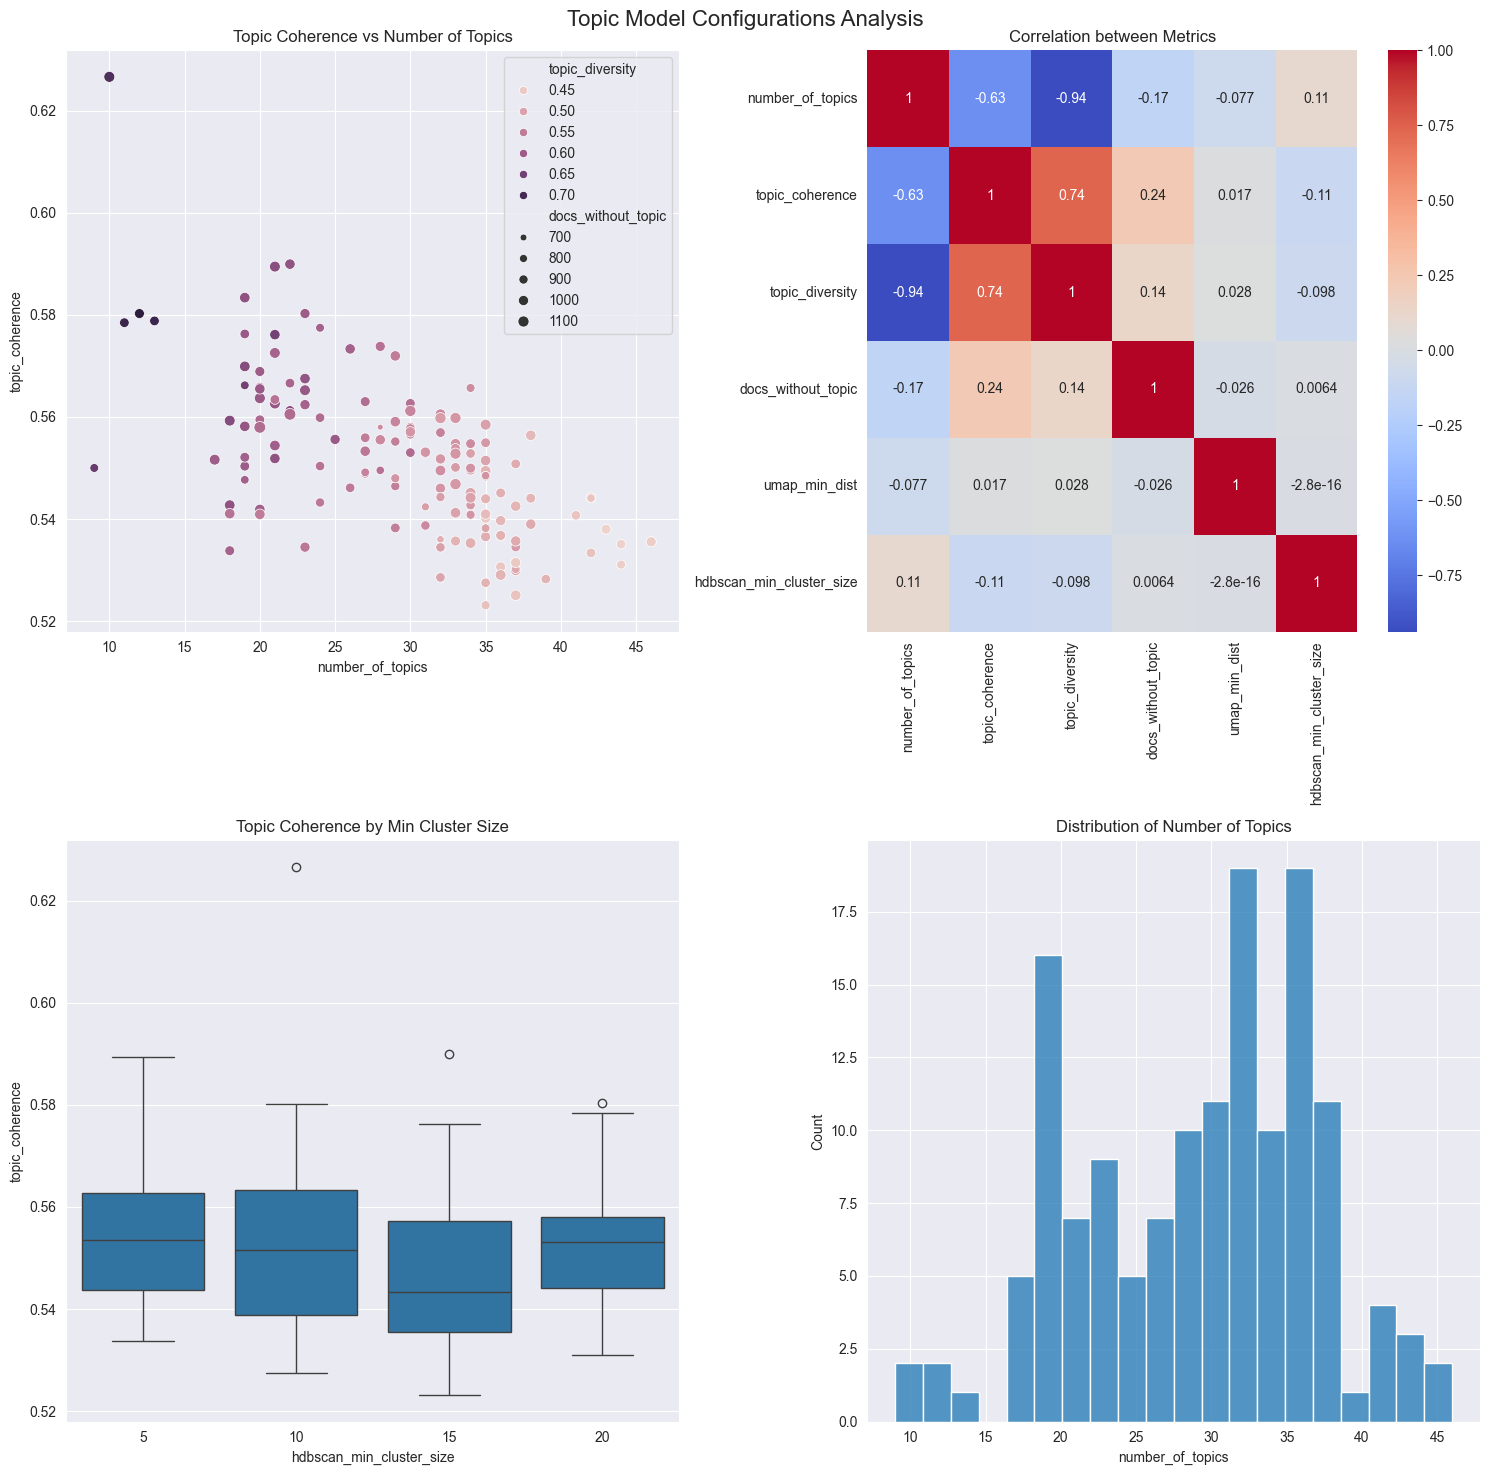

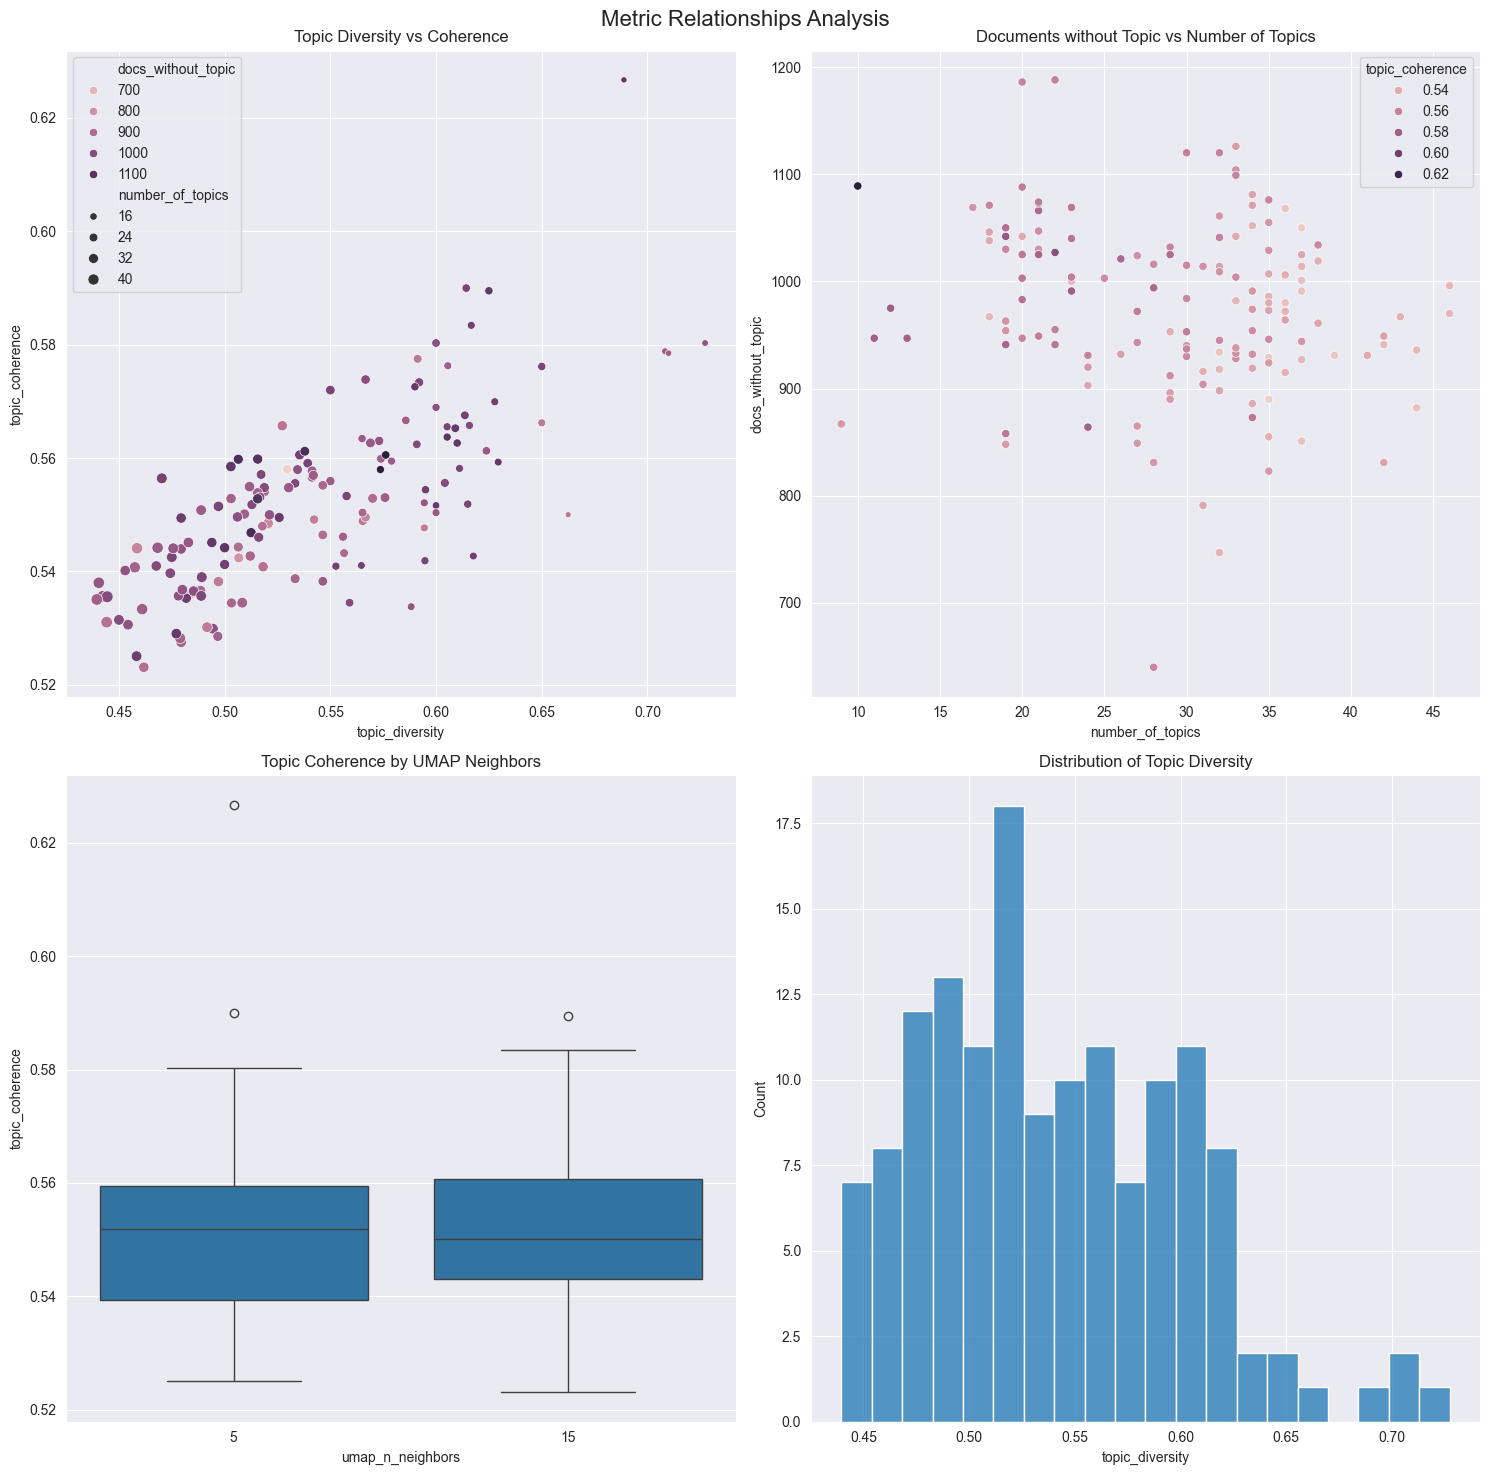

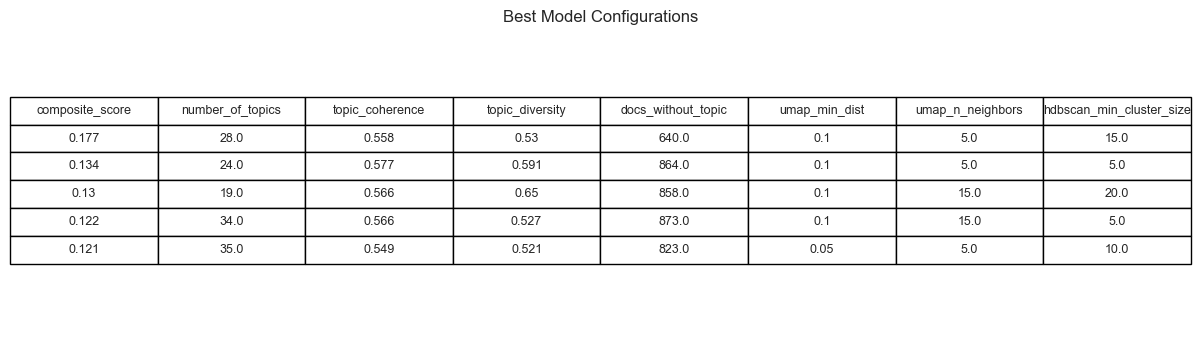

In [19]:
def plot_results_2d(results_df):
    """Create 2D visualizations for the hyperparameter tuning results without WebGL dependency."""
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Remove the model and topics columns for plotting
    plot_df = results_df.drop(['model', 'topics', 'probs'], axis=1)
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle('Topic Model Configurations Analysis', fontsize=16)
    
    # 1. Scatter plot: Topic Coherence vs Number of Topics
    sns.scatterplot(
        data=plot_df,
        x='number_of_topics',
        y='topic_coherence',
        size='docs_without_topic',
        hue='topic_diversity',
        ax=axes[0,0]
    )
    axes[0,0].set_title('Topic Coherence vs Number of Topics')
    
    # 2. Heatmap of correlation between numeric parameters
    numeric_cols = ['number_of_topics', 'topic_coherence', 'topic_diversity', 
                   'docs_without_topic', 'umap_min_dist', 'hdbscan_min_cluster_size']
    correlation = plot_df[numeric_cols].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=axes[0,1])
    axes[0,1].set_title('Correlation between Metrics')
    
    # 3. Box plots for key metrics across different HDBSCAN settings
    sns.boxplot(
        data=plot_df,
        x='hdbscan_min_cluster_size',
        y='topic_coherence',
        ax=axes[1,0]
    )
    axes[1,0].set_title('Topic Coherence by Min Cluster Size')
    
    # 4. Distribution of number of topics
    sns.histplot(
        data=plot_df,
        x='number_of_topics',
        bins=20,
        ax=axes[1,1]
    )
    axes[1,1].set_title('Distribution of Number of Topics')
    
    plt.tight_layout()
    return fig

def plot_metric_relationships(results_df):
    """Create additional 2D plots focusing on relationships between metrics."""
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Remove the model and topics columns for plotting
    plot_df = results_df.drop(['model', 'topics', 'probs'], axis=1)
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle('Metric Relationships Analysis', fontsize=16)
    
    # 1. Topic Diversity vs Topic Coherence
    sns.scatterplot(
        data=plot_df,
        x='topic_diversity',
        y='topic_coherence',
        size='number_of_topics',
        hue='docs_without_topic',
        ax=axes[0,0]
    )
    axes[0,0].set_title('Topic Diversity vs Coherence')
    
    # 2. Documents without topic vs Number of topics
    sns.scatterplot(
        data=plot_df,
        x='number_of_topics',
        y='docs_without_topic',
        hue='topic_coherence',
        ax=axes[0,1]
    )
    axes[0,1].set_title('Documents without Topic vs Number of Topics')
    
    # 3. UMAP parameters effect
    sns.boxplot(
        data=plot_df,
        x='umap_n_neighbors',
        y='topic_coherence',
        ax=axes[1,0]
    )
    axes[1,0].set_title('Topic Coherence by UMAP Neighbors')
    
    # 4. Topic diversity distribution
    sns.histplot(
        data=plot_df,
        x='topic_diversity',
        bins=20,
        ax=axes[1,1]
    )
    axes[1,1].set_title('Distribution of Topic Diversity')
    
    plt.tight_layout()
    return fig

def create_summary_table(results_df, n_best=5):
    """Create a formatted summary table of the best configurations."""
    best_models = find_best_models(results_df, n_best)
    
    summary_df = best_models[[
        'composite_score',
        'number_of_topics',
        'topic_coherence',
        'topic_diversity',
        'docs_without_topic',
        'umap_min_dist',
        'umap_n_neighbors',
        'hdbscan_min_cluster_size'
    ]].round(3)
    
    # Create a more readable table format
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(12, n_best/2 + 1))
    ax.axis('tight')
    ax.axis('off')
    
    table = ax.table(
        cellText=summary_df.values,
        colLabels=summary_df.columns,
        cellLoc='center',
        loc='center'
    )
    
    # Adjust table properties
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)
    
    plt.title('Best Model Configurations')
    plt.tight_layout()
    
    return fig

# Example usage:
# results_df = run_hyperparameter_tuning(df_news, max_combinations=50)
# 
# # Create main visualization plots
fig1 = plot_results_2d(results_df)
fig2 = plot_metric_relationships(results_df)
# 
# # Create summary table
fig3 = create_summary_table(results_df)
# 
# # Show all plots
plt.show()